In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# from google.colab import drive
# drive.mount("/content/drive")

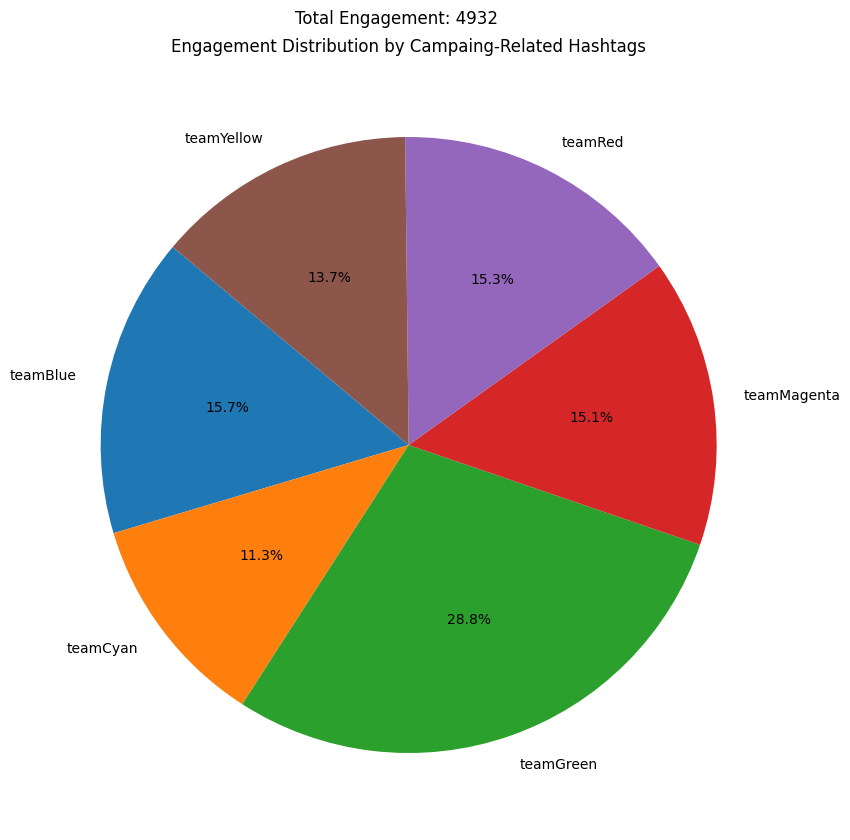

In [10]:
# ---
# Group No. 13
# 1. อชิระ ชัชวาลย์      6210450385
# 2. อภิสิทธิ์ แสงสารพันธ์ 6210450393
# 3. รัศมีดาว สุทธิศรี     6210450971
# ---

group = 13
problem = 4 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".json"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_json(data_path, lines=True)

# --- เริ่มเขียนโค้ดตรงนี้ ---

data['Hashtag'] = data['Hashtag'].astype(str).replace('nan', '')
s = data['Hashtag'].str.split(', ').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Hashtag'
data = data.drop('Hashtag', axis=1).join(s)
data = data[data['Hashtag'].str.startswith('team')]
data['TotalEngagement'] = data['Likes'] + data['Retweets']
data = data.groupby('Hashtag')[['Likes', 'Retweets', 'TotalEngagement']].sum()
data = data[data['TotalEngagement'] > 0]
total_engagement = data['TotalEngagement'].sum()

if not data.empty:
    plt.figure(figsize=(10, 10))
    plt.pie(data['TotalEngagement'], labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title('Engagement Distribution by Campaing-Related Hashtags')
    plt.suptitle(f'Total Engagement: {total_engagement}', y=0.93)


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()